# <font color= maroon> Project Background & Aims 

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# <font color= maroon>  Data Preparation 

## <font color= grey> Data Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df=pd.read_csv("bikesdata.csv", encoding='cp1252', parse_dates=['Date'], dayfirst=False)

In [3]:
# check first 5 rows of the data
df.head()

,S/N,Date,Country,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Snowfall,Open,Hit_Sales,Region,Latitude,Longitude
0,1,2018-11-23,JP,196.0,0.0,-1.7,79.0,0.5,3,-4.8,0.0,0.0,low,Yes,N,South,37.453024,127.718234
1,2,2018-11-23,JP,250.0,1.0,-1.6,79.0,0.6,3,-4.7,0.0,0.0,NaN,Yes,N,South,37.805615,127.766506
2,3,2018-11-23,JP,161.0,2.0,-1.1,79.0,0.7,3,-4.2,0.0,0.0,low,Yes,N,South,37.276916,127.736311
3,4,2018-11-23,JP,99.0,3.0,-0.6,76.0,0.5,3,-4.3,0.0,0.0,low,Yes,N,South,37.416781,128.262240
4,5,2018-11-23,JP,64.0,4.0,-0.3,76.0,0.9,3,-4.0,0.0,0.0,low,Yes,N,South,37.377350,127.895479


In [4]:
# shape of the dataset
df.shape

(8763, 18)

* we have 8763 number of rows and 18 number of columns

In [5]:
#columns names in the dataset
df.columns

Index(['S/N', 'Date', 'Country', 'Rented_Bike_Count', 'Hour', 'Temperature',
       'Humidity', 'Windspeed', 'Visibility', 'Dewpoint_Temp',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Open', 'Hit_Sales',
       'Region', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
df.dtypes

S/N                           int64
Date                 datetime64[ns]
Country                      object
Rented_Bike_Count           float64
Hour                        float64
Temperature                 float64
Humidity                    float64
Windspeed                   float64
Visibility                    int64
Dewpoint_Temp               float64
Solar_Radiation             float64
Rainfall                    float64
Snowfall                     object
Open                         object
Hit_Sales                    object
Region                       object
Latitude                    float64
Longitude                   float64
dtype: object

Provide the description, justification and results of your technique(s) here.

In [7]:
#basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   S/N                8763 non-null   int64         
 1   Date               8763 non-null   datetime64[ns]
 2   Country            8763 non-null   object        
 3   Rented_Bike_Count  8751 non-null   float64       
 4   Hour               8739 non-null   float64       
 5   Temperature        8739 non-null   float64       
 6   Humidity           8751 non-null   float64       
 7   Windspeed          8763 non-null   float64       
 8   Visibility         8763 non-null   int64         
 9   Dewpoint_Temp      8763 non-null   float64       
 10  Solar_Radiation    8763 non-null   float64       
 11  Rainfall           8763 non-null   float64       
 12  Snowfall           8751 non-null   object        
 13  Open               8763 non-null   object        
 14  Hit_Sale

In [8]:
# Statistical Summary of dataset 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S/N,8763.0,4382.000000,2529.804538,1.000000,2191.500000,4382.000000,6572.500000,8763.000000
Rented_Bike_Count,8751.0,708.364987,736.971460,-2.000000,191.500000,505.000000,1066.000000,34180.000000
Hour,8739.0,11.521684,6.910710,0.000000,6.000000,12.000000,18.000000,23.000000
Temperature,8739.0,13.152249,13.568357,-44.500000,3.400000,13.800000,22.600000,166.600000
Humidity,8751.0,58.238601,20.362598,0.000000,42.000000,57.000000,74.000000,98.000000
Windspeed,8763.0,1.724649,1.036229,0.000000,0.900000,1.500000,2.300000,7.400000
Visibility,8763.0,3.725436,1.070309,1.000000,3.000000,4.000000,5.000000,5.000000
Dewpoint_Temp,8763.0,4.074027,13.060726,-30.600000,-4.700000,5.100000,14.800000,27.200000
Solar_Radiation,8763.0,0.568916,0.868661,0.000000,0.000000,0.010000,0.930000,3.520000
Rainfall,8763.0,0.148636,1.128003,0.000000,0.000000,0.000000,0.000000,35.000000


In [9]:
# Categorical Summary of Dataset
df.describe(include = 'O').T

,count,unique,top,freq
Country,8763,1,JP,8763
Snowfall,8751,4,low,8660
Open,8763,6,Yes,8458
Hit_Sales,8743,2,N,6331
Region,8763,1,South,8763


In [10]:
#check if there is any null value in the dataset 
df.isna().sum()

S/N                   0
Date                  0
Country               0
Rented_Bike_Count    12
Hour                 24
Temperature          24
Humidity             12
Windspeed             0
Visibility            0
Dewpoint_Temp         0
Solar_Radiation       0
Rainfall              0
Snowfall             12
Open                  0
Hit_Sales            20
Region                0
Latitude              0
Longitude             0
dtype: int64

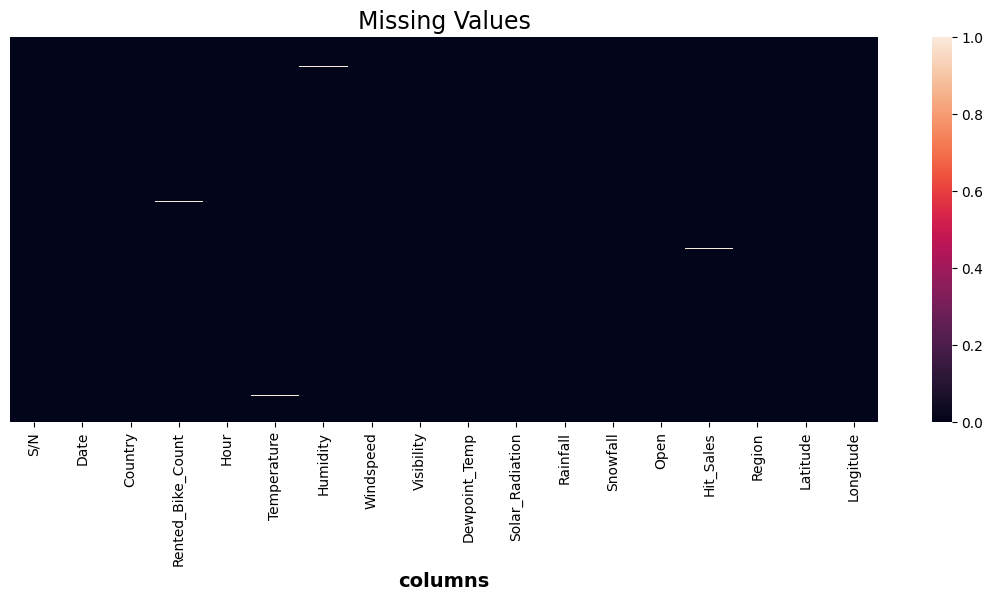

In [11]:
# Checking missing values in graphical form
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("columns", size=14, weight="bold")
plt.title("Missing Values",size=17)
plt.show()

#### Perform data cleaning by appropriate methods of deletion and simple imputation based on statistical estimates (i.e., mean, mode, median), depending on the data quality issues presented in the attributes. Justify the approaches.

1) **Rented_Bike_Count:**
Since this column represents the target variable and has 12 null values, it's not appropriate to impute the target values. Therefore, we can drop the rows with null values for this column.


2) **Hour, Temperature, Humidity, Snowfall, and Hit_Sales:**
For these columns, we can use simple imputation methods such as mean, mode, or median to fill in the null values, depending on the data type and distribution.

* Hour: Since it's a float column representing the hour of the day, we can impute the null values with the median value. It's a reasonable approach as the median represents the central tendency, and using it helps maintain the overall distribution of the data.

* Temperature and Humidity: Both of these columns are float columns representing weather attributes. We can impute the null values with the mean value since it provides a good estimate of the overall values in the dataset.

* Snowfall: This column is currently of type object. Before imputing the null values, we need to convert it to a numeric data type. If the conversion is successful, we can impute the null values with the mean value. Otherwise, we can drop the column if it cannot be converted to a numeric type.

* Hit_Sales: Since it's an object column, we need to analyze the data further to determine the appropriate imputation method. If the column contains categorical data, we can impute the null values with the mode (most frequent value). If it contains numerical data, we can convert it to a numeric type and then impute using mean or median.



In [12]:
# Drop rows with null values in 'Rented_Bike_Count'
df.dropna(subset=['Rented_Bike_Count'], inplace=True)

# Impute 'Hour' with the median
df['Hour'].fillna(df['Hour'].median(), inplace=True)

# Impute 'Temperature' and 'Humidity' with the mean
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)
df['Humidity'].fillna(df['Humidity'].mean(), inplace=True)

# Impute 'Hit_Sales' with the mode (most frequent value)
df['Hit_Sales'].fillna(df['Hit_Sales'].mode().iloc[0], inplace=True)

# Impute 'Snowfall' with the mode (most frequent value)
df['Snowfall'].fillna(df['Snowfall'].mode().iloc[0], inplace=True)

In [13]:
#test if still there is a null values
df.isna().sum()

S/N                  0
Date                 0
Country              0
Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Windspeed            0
Visibility           0
Dewpoint_Temp        0
Solar_Radiation      0
Rainfall             0
Snowfall             0
Open                 0
Hit_Sales            0
Region               0
Latitude             0
Longitude            0
dtype: int64

There is no null values left

In [14]:
# open columns has abnormal data
df['Open'].unique()

array(['Yes', 'yes ', 'yes', 'Y', 'No', 'n'], dtype=object)

In [15]:
df['Open'].value_counts()

Yes     8446
No       290
n          5
Y          4
yes        4
yes        2
Name: Open, dtype: int64

In [16]:
#replace n with No
df['Open'] = df['Open'].replace('n', 'No')

In [17]:
#replace Y or yes with yes
df['Open'] = df['Open'].replace('yes', 'Yes')
df['Open'] = df['Open'].replace('Y', 'Yes')
df['Open'] = df['Open'].replace('yes ', 'Yes')

In [18]:
#test if the abnormal values are fixed 
df['Open'].unique()

array(['Yes', 'No'], dtype=object)

## <font color= grey> Data Transformation (also known as Features Engineering)

Provide the description of how you have used ChatGPT or other internet sources to brainstorm for ideas. 

### Tranformation 1

Provide the description, justification and results of your technique(s) here.

**Binning Temperature:**
Binning is a technique that helps in grouping continuous numerical data into discrete intervals or bins. In this case, we can create bins for the 'Temperature' attribute. For example, we can create bins such as "Low," "Medium," and "High" to represent different temperature ranges.

By binning the 'Temperature' attribute, we convert a continuous variable into a categorical variable. This transformation can be beneficial in downstream analysis and modeling as it captures the non-linear relationship between temperature and the target variable. Binning allows us to analyze the impact of temperature ranges on the target variable more effectively, as it takes into account the relative importance of different temperature intervals.

In [19]:
#check the minimum temperature
df['Temperature'].min()

-44.5

In [20]:
#check the maximum temperature
df['Temperature'].max()

166.6

In [21]:
# Binning Temperature
temperature_bins = [-50, 2, 14, 25, 40, 170]
temperature_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Temperature_bin'] = pd.cut(df['Temperature'], bins=temperature_bins, labels=temperature_labels)

In [22]:
df['Temperature_bin'].unique()

['Very Low', 'Low', 'Very High', 'High', 'Medium']
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

### Tranformation 2 

Provide the description, justification and results of your technique(s) here.

**Creating Seasonal Indicator:**
We have 'Date' column, which can be used to derive a new attribute representing the season. We can extract the month from the 'Date' column and create a new column called 'Season' with values such as "Winter," "Spring," "Summer," and "Autumn."

Adding a seasonal indicator can provide valuable information for downstream analysis and modeling. It allows us to capture the seasonal patterns and variations in the data, which may have a significant impact on the target variable. For example, if the dataset contains information about bike rentals, the seasonality attribute can help identify whether bike rentals are higher in specific seasons (e.g., summer) compared to others (e.g., winter). This information can be used to develop more accurate predictive models or gain insights into seasonal demand patterns.

In [23]:
# Creating Seasonal Indicator
df['Season'] = df['Date'].dt.month.map({
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Autumn',
    10: 'Autumn',
    11: 'Autumn',
    12: 'Winter'
})

In [24]:
#check first 5 rows of data
df.head()

,S/N,Date,Country,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Snowfall,Open,Hit_Sales,Region,Latitude,Longitude,Temperature_bin,Season
0,1,2018-11-23,JP,196.0,0.0,-1.7,79.0,0.5,3,-4.8,0.0,0.0,low,Yes,N,South,37.453024,127.718234,Very Low,Autumn
1,2,2018-11-23,JP,250.0,1.0,-1.6,79.0,0.6,3,-4.7,0.0,0.0,low,Yes,N,South,37.805615,127.766506,Very Low,Autumn
2,3,2018-11-23,JP,161.0,2.0,-1.1,79.0,0.7,3,-4.2,0.0,0.0,low,Yes,N,South,37.276916,127.736311,Very Low,Autumn
3,4,2018-11-23,JP,99.0,3.0,-0.6,76.0,0.5,3,-4.3,0.0,0.0,low,Yes,N,South,37.416781,128.262240,Very Low,Autumn
4,5,2018-11-23,JP,64.0,4.0,-0.3,76.0,0.9,3,-4.0,0.0,0.0,low,Yes,N,South,37.377350,127.895479,Very Low,Autumn


## <font color= grey> Pearson's Correlation Analysis

Provide the description, justification and results of your technique(s) here.

**Interval Columns** : "Rented_Bike_Count", "Hour", "Temperature", "Humidity", "Windspeed", "Visibility", "Dewpoint_Temp", "Solar_Radiation", "Rainfall", "Latitude", "Longitude"

**Ordinal Columns** : "Snowfall", "Temperature_bin"

In [25]:
# Insert your codes here to generate the result.
# Compute the correlation matrix

columns_of_interest = ["Snowfall", "Temperature_bin", "Rented_Bike_Count", "Hour", "Temperature", "Humidity", "Windspeed", "Visibility", "Dewpoint_Temp", "Solar_Radiation", "Rainfall", "Latitude", "Longitude"]

# Convert ordinal columns to numerical representation for correlation analysis
df['Snowfall'] = pd.Categorical(df['Snowfall'], categories=['low', 'medium', 'heavy', 'very heavy'], ordered=True).codes
df['Temperature_bin'] = pd.Categorical(df['Temperature_bin'], categories=['Very Low', 'Low', 'Very High', 'High', 'Medium'], ordered=True).codes

correlation_matrix = df[columns_of_interest].corr()

correlation_matrix

,Snowfall,Temperature_bin,Rented_Bike_Count,Hour,Temperature,Humidity,Windspeed,Visibility,Dewpoint_Temp,Solar_Radiation,Rainfall,Latitude,Longitude
Snowfall,1.000000,-0.109799,-0.073181,-0.013837,-0.094341,0.110693,-0.024958,-0.110592,-0.052896,-0.047443,0.016995,0.010923,0.004013
Temperature_bin,-0.109799,1.000000,0.416958,0.070427,0.736249,0.164695,-0.046524,0.043887,0.769658,0.257103,0.086945,0.012130,0.010643
Rented_Bike_Count,-0.073181,0.416958,1.000000,0.363295,0.431290,-0.178784,0.111699,0.176327,0.336119,0.233296,-0.108058,0.008720,0.004164
Hour,-0.013837,0.070427,0.363295,1.000000,0.105073,-0.242818,0.284703,0.089693,0.000773,0.142899,0.009068,-0.002892,0.002205
Temperature,-0.094341,0.736249,0.431290,0.105073,1.000000,0.145148,-0.019545,0.043498,0.810886,0.308896,0.048370,0.014527,0.013529
Humidity,0.110693,0.164695,-0.178784,-0.242818,0.145148,1.000000,-0.336475,-0.498100,0.536778,-0.462091,0.235913,-0.001001,-0.000540
Windspeed,-0.024958,-0.046524,0.111699,0.284703,-0.019545,-0.336475,1.000000,0.129520,-0.176195,0.332197,-0.019254,0.000749,0.012880
Visibility,-0.110592,0.043887,0.176327,0.089693,0.043498,-0.498100,0.129520,1.000000,-0.152373,0.083496,-0.170985,-0.007545,0.001791
Dewpoint_Temp,-0.052896,0.769658,0.336119,0.000773,0.810886,0.536778,-0.176195,-0.152373,1.000000,0.094296,0.125210,0.004845,0.006820
Solar_Radiation,-0.047443,0.257103,0.233296,0.142899,0.308896,-0.462091,0.332197,0.083496,0.094296,1.000000,-0.074006,-0.006536,0.004121


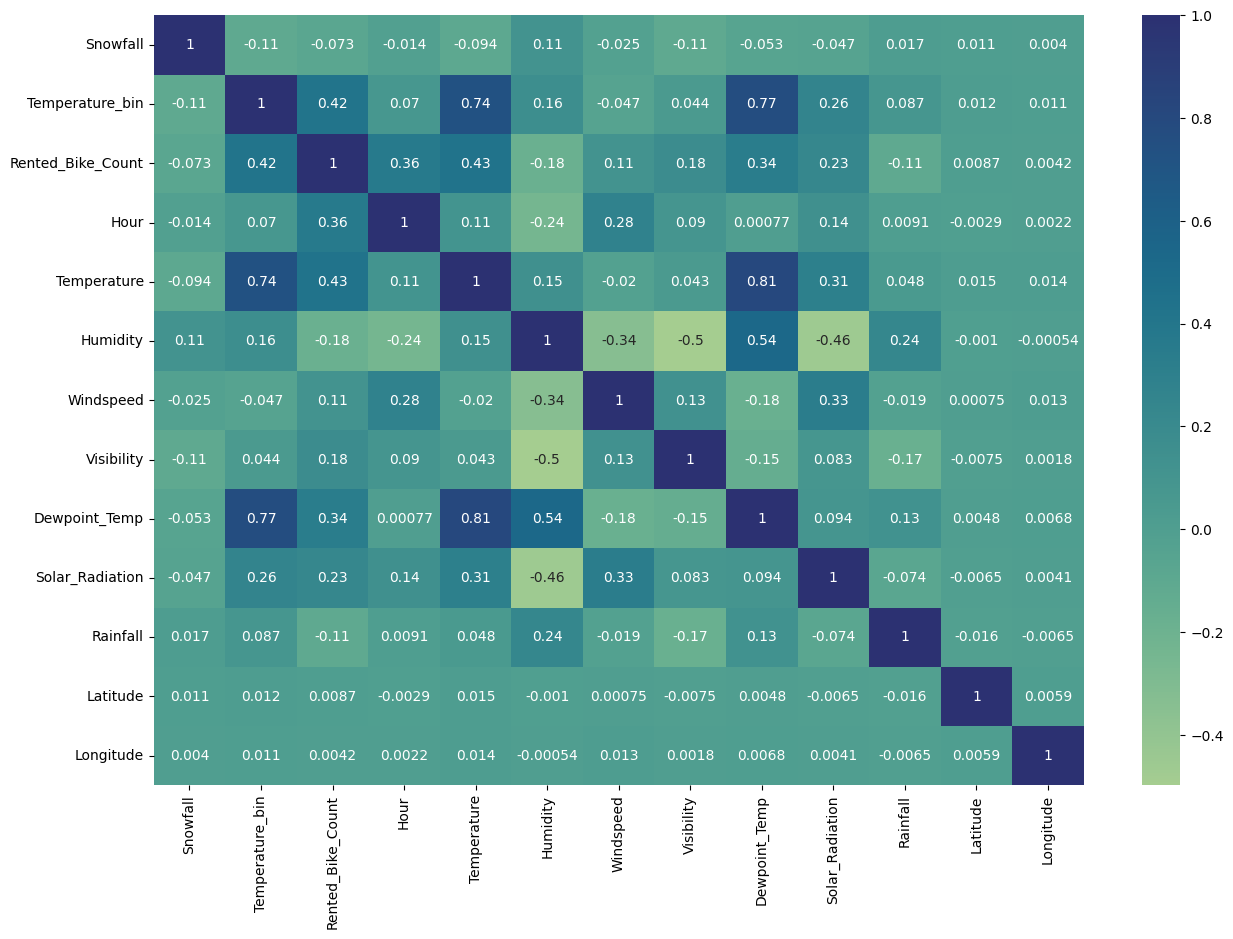

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,cmap='crest',annot=True)
plt.show()

The **Pearson correlation** coefficient measures the linear relationship between two continuous variables and provides a value between -1 and 1, where -1 indicates a strong negative correlation, 0 indicates no correlation, and 1 indicates a strong positive correlation.

* A positive correlation indicates that as one attribute increases, the other tends to increase, while a negative correlation suggests an inverse relationship. The magnitude of the correlation coefficient indicates the strength of the relationship, with values closer to -1 or 1 indicating stronger correlations. A correlation coefficient close to 0 implies no linear relationship between the attributes.

* We Converted the ordinal columns, "Snowfall" and "Temperature_bin," into a numerical representation using the pd.Categorical function. By specifying the categories and setting ordered=True, we preserve the ordinal nature of the columns. 

#### Observation:

1) **Ordinal-Ordinal Relationships:**

Snowfall and Temperature_bin: The correlation coefficient between these two ordinal columns is -0.109799. While the correlation is not very strong, it indicates a slight negative relationship between snowfall and temperature categories. As the snowfall category increases for example(from 'low' to 'very heavy'), the temperature category tends to decrease or (from 'Very High' to 'Very Low').

2) **Interval/Ratio-Interval/Ratio Relationships:**

* Rented_Bike_Count and Temperature: The correlation coefficient between these two interval columns is 0.431290. It suggests a moderate positive correlation between the count of rented bikes and temperature. Higher temperatures are associated with a higher count of rented bikes.
* Temperature and Dewpoint_Temp: These two interval columns have a strong positive correlation coefficient of 0.810886. This indicates a high positive association between temperature and dew point temperature. As temperature increases, dew point temperature tends to increase as well.
* Temperature and Solar_Radiation: The correlation coefficient between these two interval columns is 0.308896, indicating a moderate positive correlation. Higher temperatures tend to be associated with higher solar radiation levels.
* Humidity and Dewpoint_Temp: These interval columns have a correlation coefficient of 0.536778, indicating a moderate positive correlation. As humidity increases, dew point temperature also tends to increase.
* Humidity and Visibility: The correlation coefficient between these interval columns is -0.498100, indicating a moderate negative correlation. Higher humidity levels tend to be associated with lower visibility.
* Humidity and Windspeed: These interval columns have a negative correlation coefficient of -0.336475, suggesting a moderate negative correlation. As humidity increases, windspeed tends to decrease.
* Dewpoint_Temp and Temperature_bin: These two interval and ordinal columns have a correlation coefficient of 0.769658, indicating a strong positive correlation. Higher temperature categories (e.g., 'Very High') are associated with higher dew point temperatures.


By analyzing the correlation matrix, we can identify relationships between the attributes that may be useful for feature selection in downstream data modeling. Features with strong positive or negative correlations can be considered for inclusion in the modeling process as they indicate potential relationships and predictive power. For example, attributes such as Rented_Bike_Count, Temperature, Dewpoint_Temp, and Humidity might be good candidates for feature selection as they show significant correlations with each other.

## <font color= grey> Other Statistical Method

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
def get_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [ variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif

In [29]:
not_for_vif = [ "Day", "Month", "Year", "Rented Bike Count"] 

get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,S/N,6.490412
1,Rented_Bike_Count,3.092162
2,Hour,4.892523
3,Temperature,8.818026
4,Humidity,44.070107
5,Windspeed,4.879781
6,Visibility,20.487411
7,Dewpoint_Temp,10.794761
8,Solar_Radiation,2.743805
9,Rainfall,1.115084


Let's drop Latitude Longitude and test again

In [30]:
df = df.drop(['Latitude', 'Longitude'], axis = 1)

In [31]:
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,S/N,6.363614
1,Rented_Bike_Count,3.038029
2,Hour,4.592825
3,Temperature,8.055553
4,Humidity,7.490315
5,Windspeed,4.825443
6,Visibility,12.179803
7,Dewpoint_Temp,6.390379
8,Solar_Radiation,2.162587
9,Rainfall,1.107245


In [32]:
df = df.drop(['Visibility', 'S/N'], axis = 1)

In [33]:
df = df.drop(['Temperature'], axis = 1)

In [34]:
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

,variables,VIF
0,Rented_Bike_Count,2.882113
1,Hour,4.467007
2,Humidity,4.604167
3,Windspeed,4.597062
4,Dewpoint_Temp,2.764861
5,Solar_Radiation,2.014995
6,Rainfall,1.082429
7,Snowfall,1.040565
8,Temperature_bin,6.494027


# <font color= maroon> Exploratory Data Analysis

In [35]:
# converting date column dtype object to date 
df['Date']=pd.to_datetime(df['Date'])


# extracting day,month, day of week and weekdays/weekend from date column
df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month_name()
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 'WeekEnd' if x=='Saturday' or x=='Sunday' else "WeekDay" )

I just realized that Hour column is a numerical column but it is a time stamp so we have to treat Hour as a categorical feature

In [36]:
# convert Hour column to Categorical 
df['Hour']=df['Hour'].astype('object')

In [37]:
# separate Data in categorical and numerical features
numeric_data= df.select_dtypes(exclude='object')
categorical_data=df.select_dtypes(include=['object', 'category'])

In [38]:
numeric_data.head()

,Date,Rented_Bike_Count,Humidity,Windspeed,Dewpoint_Temp,Solar_Radiation,Rainfall,Snowfall,Temperature_bin
0,2018-11-23,196.0,79.0,0.5,-4.8,0.0,0.0,0,0
1,2018-11-23,250.0,79.0,0.6,-4.7,0.0,0.0,0,0
2,2018-11-23,161.0,79.0,0.7,-4.2,0.0,0.0,0,0
3,2018-11-23,99.0,76.0,0.5,-4.3,0.0,0.0,0,0
4,2018-11-23,64.0,76.0,0.9,-4.0,0.0,0.0,0,0


In [39]:
categorical_data.head()

,Country,Hour,Open,Hit_Sales,Region,Season,month,day_of_week,weekdays_weekend
0,JP,0.0,Yes,N,South,Autumn,November,Friday,WeekDay
1,JP,1.0,Yes,N,South,Autumn,November,Friday,WeekDay
2,JP,2.0,Yes,N,South,Autumn,November,Friday,WeekDay
3,JP,3.0,Yes,N,South,Autumn,November,Friday,WeekDay
4,JP,4.0,Yes,N,South,Autumn,November,Friday,WeekDay


In [40]:
# checking categorical columns value count
for i in categorical_data.columns:
    print("\n ")
    print('column name  : ', i)
    print(df[i].value_counts())


 
column name  :  Country
JP    8751
Name: Country, dtype: int64

 
column name  :  Hour
12.0    388
5.0     366
20.0    366
15.0    365
2.0     365
21.0    365
6.0     365
8.0     365
10.0    365
18.0    365
1.0     365
16.0    365
22.0    364
19.0    364
17.0    364
23.0    364
14.0    364
13.0    364
11.0    364
9.0     364
4.0     364
7.0     363
3.0     362
0.0     345
Name: Hour, dtype: int64

 
column name  :  Open
Yes    8456
No      295
Name: Open, dtype: int64

 
column name  :  Hit_Sales
N    6340
Y    2411
Name: Hit_Sales, dtype: int64

 
column name  :  Region
South    8751
Name: Region, dtype: int64

 
column name  :  Season
Summer    2204
Autumn    2185
Winter    2182
Spring    2180
Name: Season, dtype: int64

 
column name  :  month
December     767
November     745
August       744
May          743
January      743
July         742
September    720
October      720
March        719
April        718
June         718
February     672
Name: month, dtype: int64

 
column 

In [41]:
numeric_data.drop([ 'Date'],axis = 1, inplace = True)

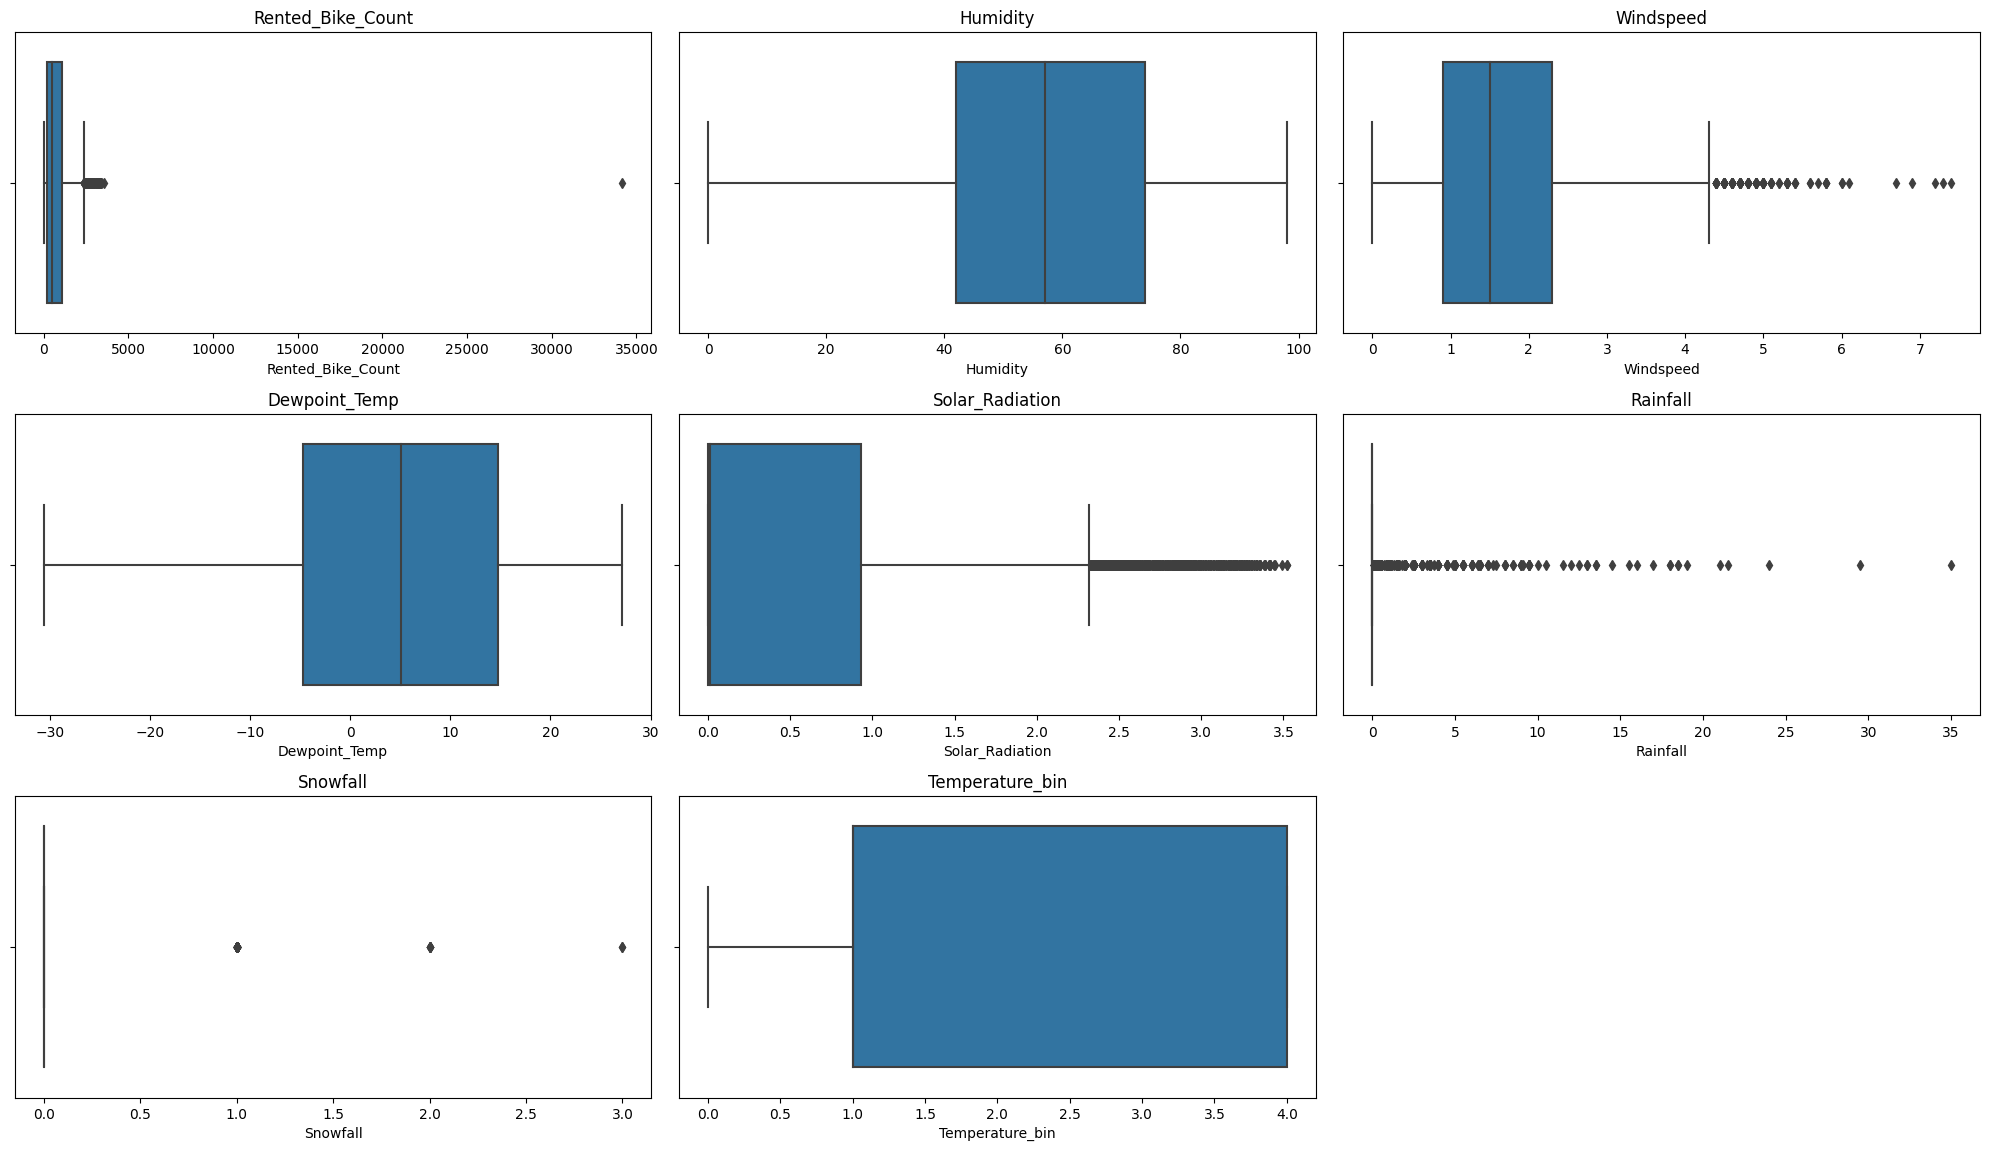

In [42]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_data.columns:
    plt.subplot(4,3,n)
    n=n+1
    sns.boxplot(df[i])
    plt.title(i)
    plt.tight_layout()

We can ignore some of the outliers now

In [43]:
#let's delete country and region columns from categorical data because they have only one category
categorical_data.drop(['Country', 'Region'], axis =1 , inplace = True)

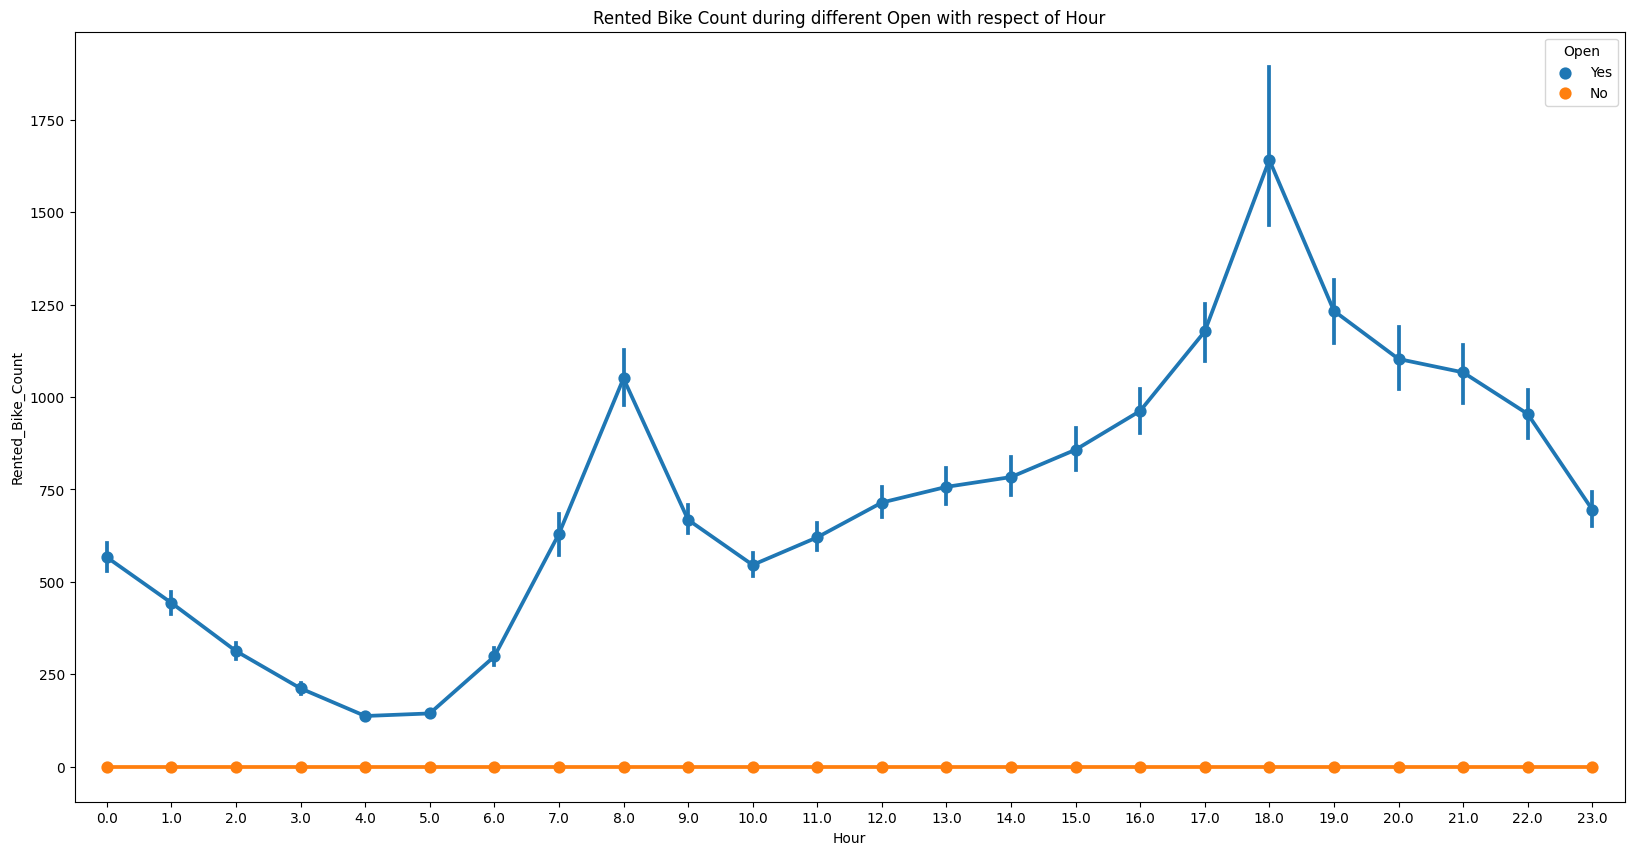

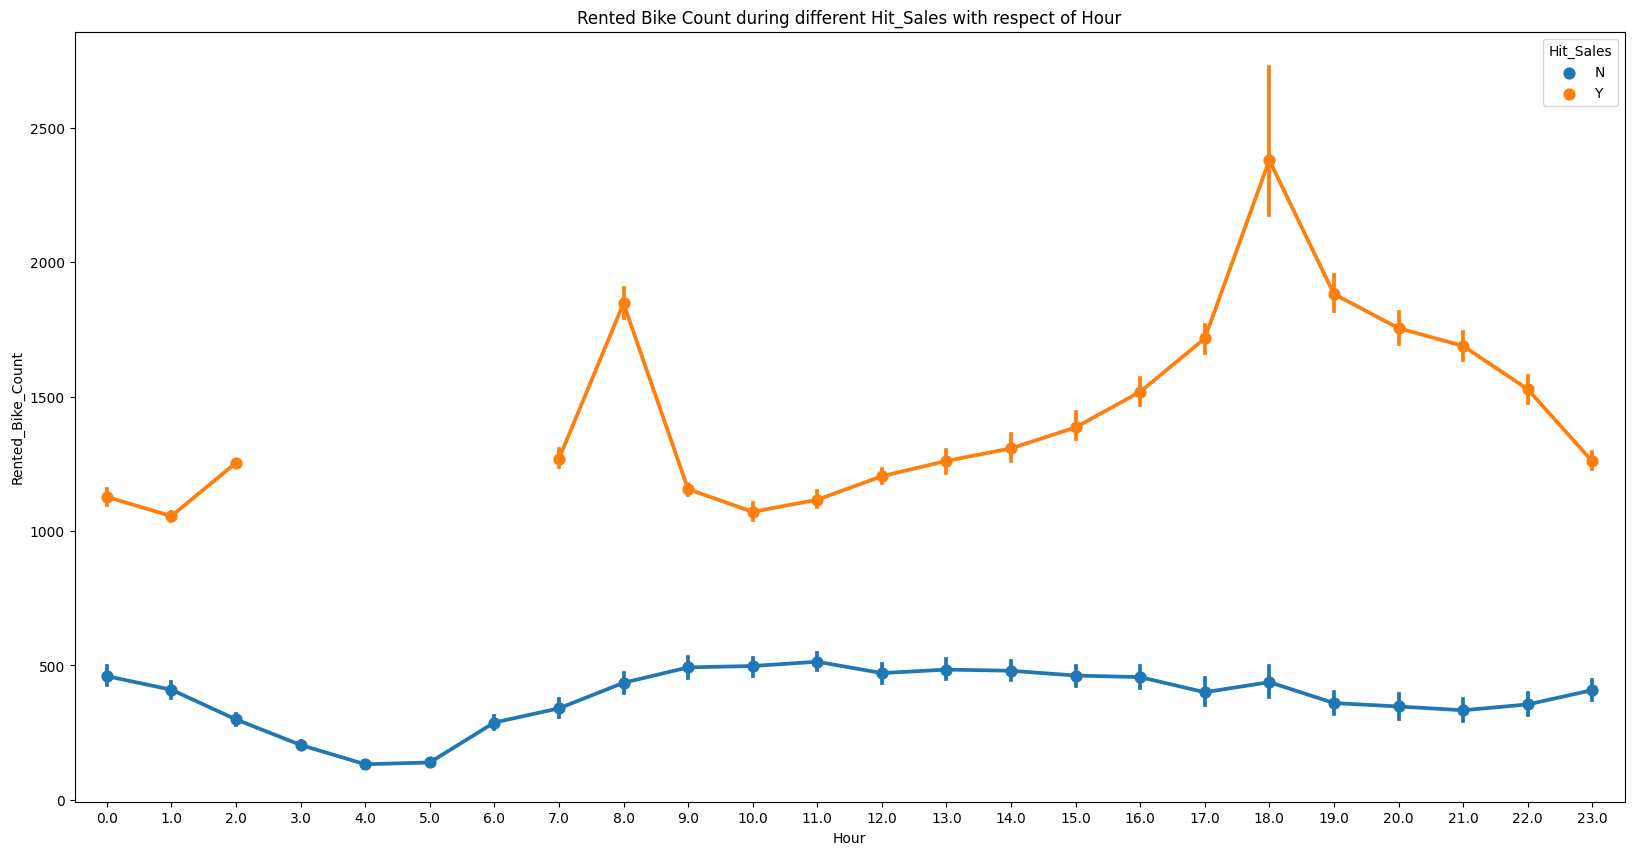

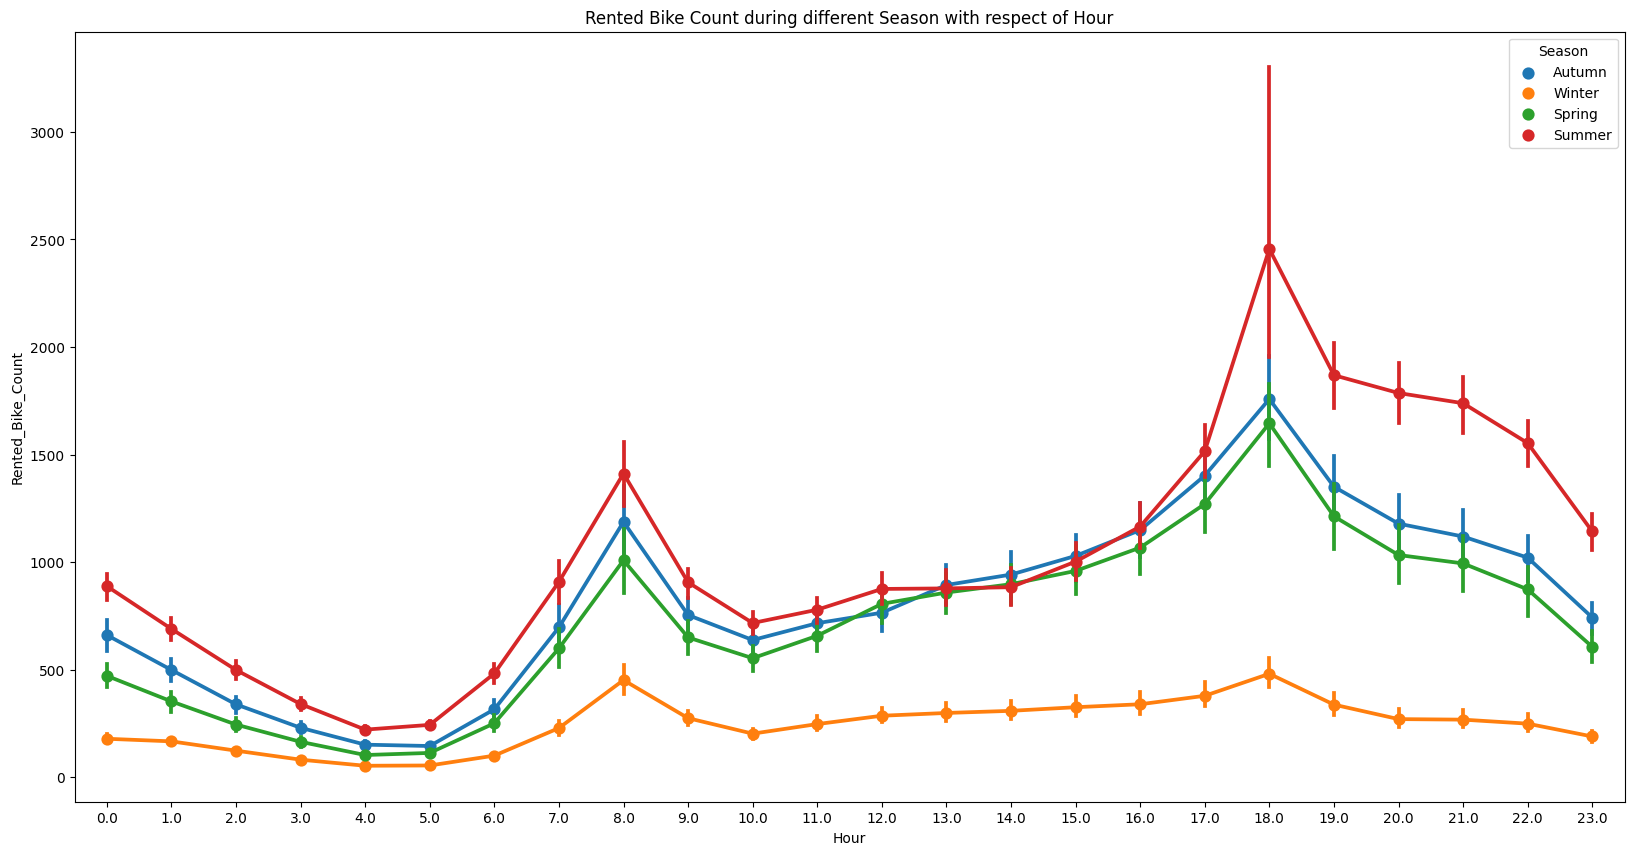

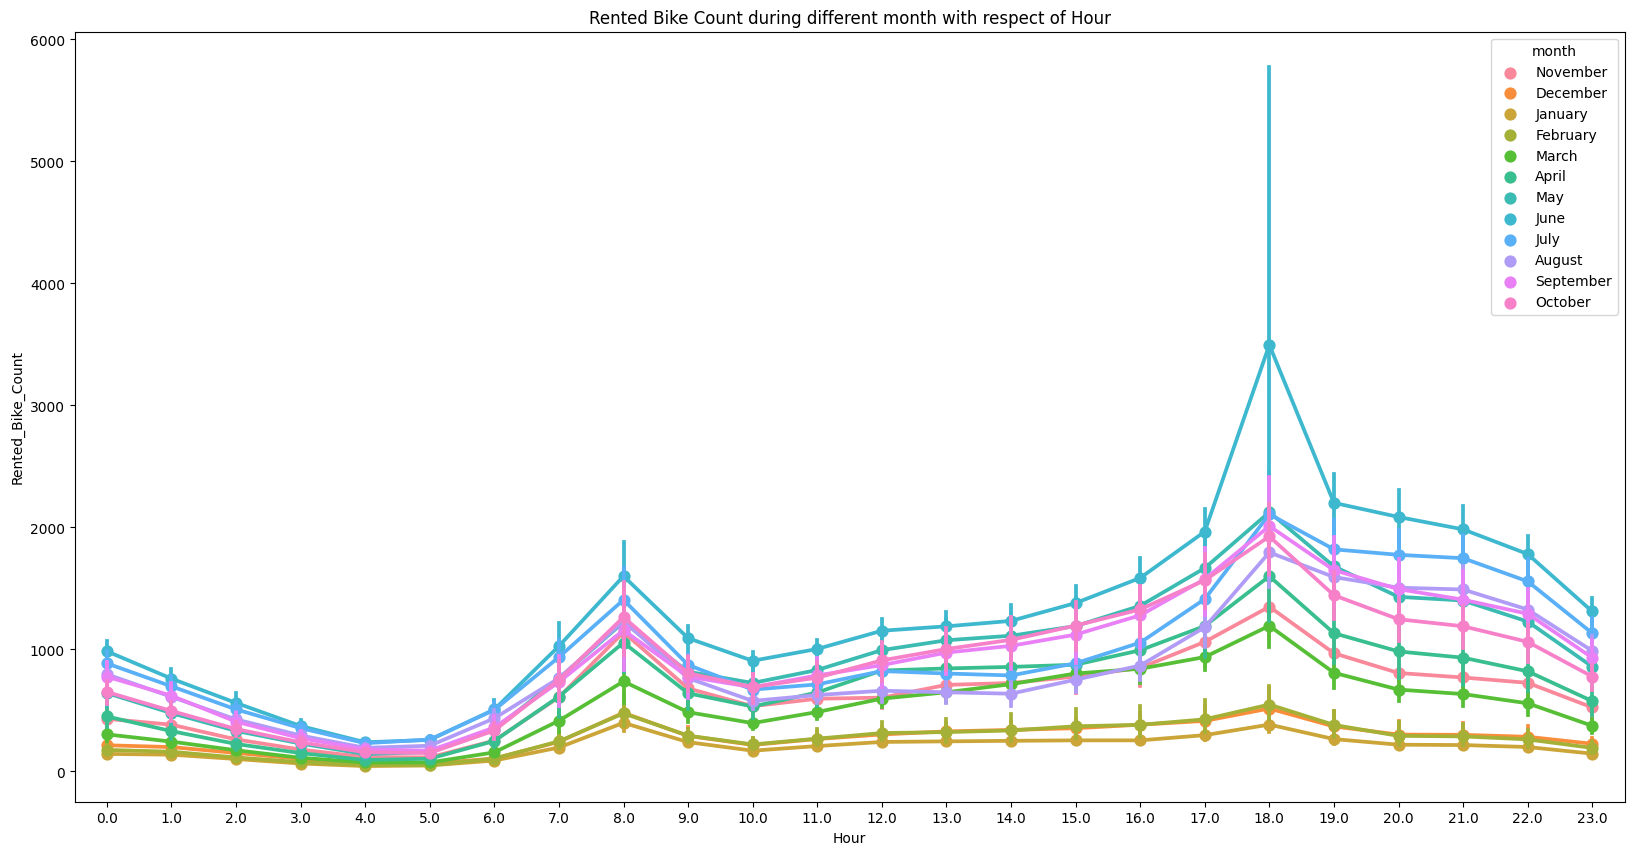

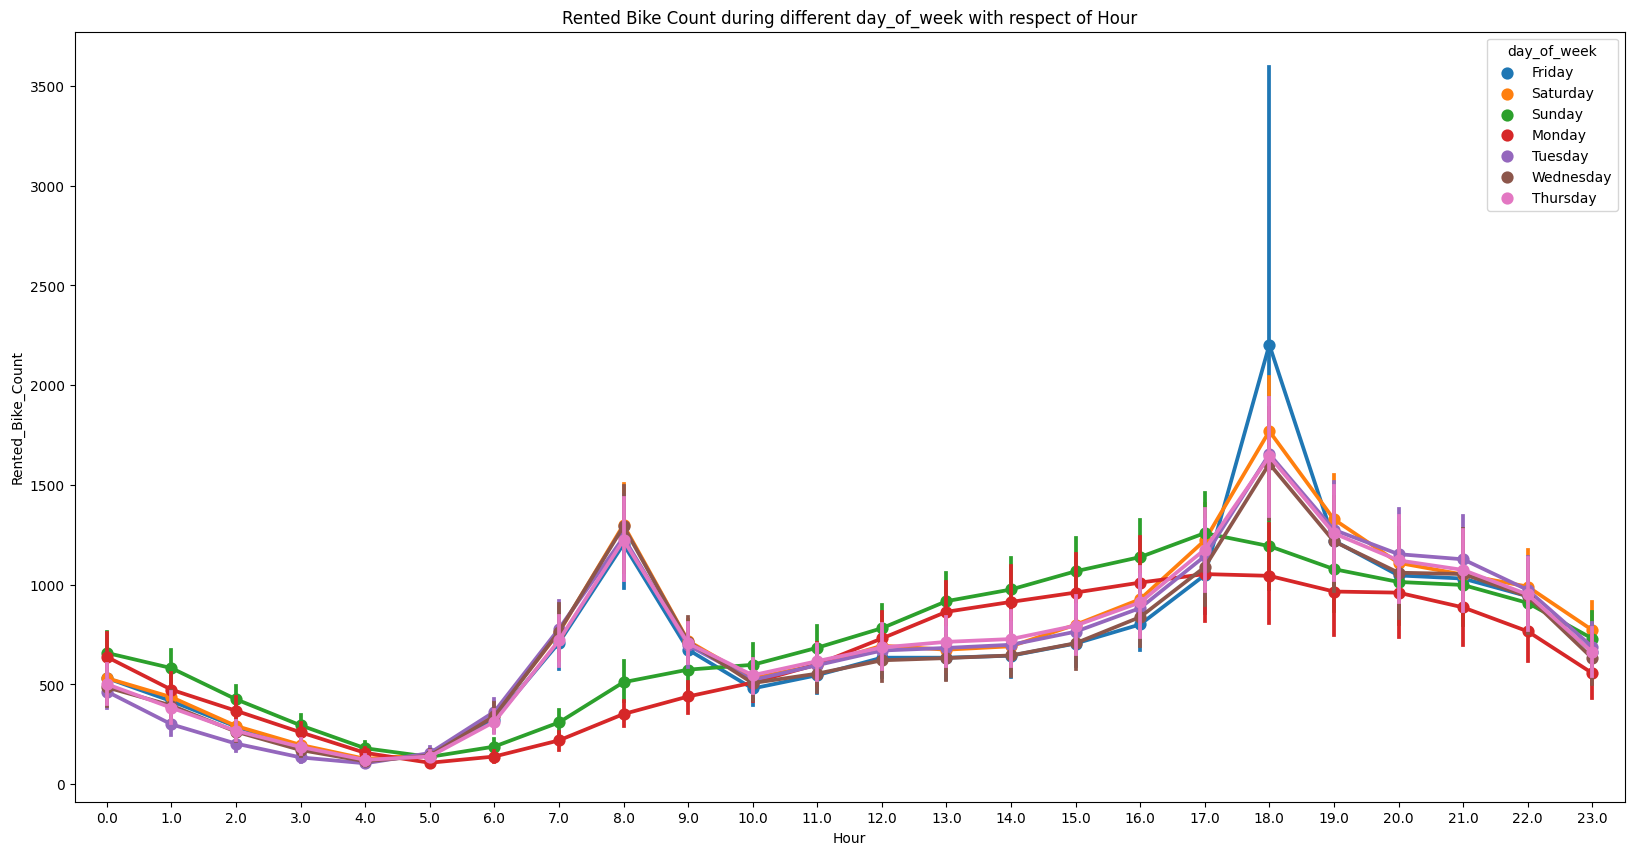

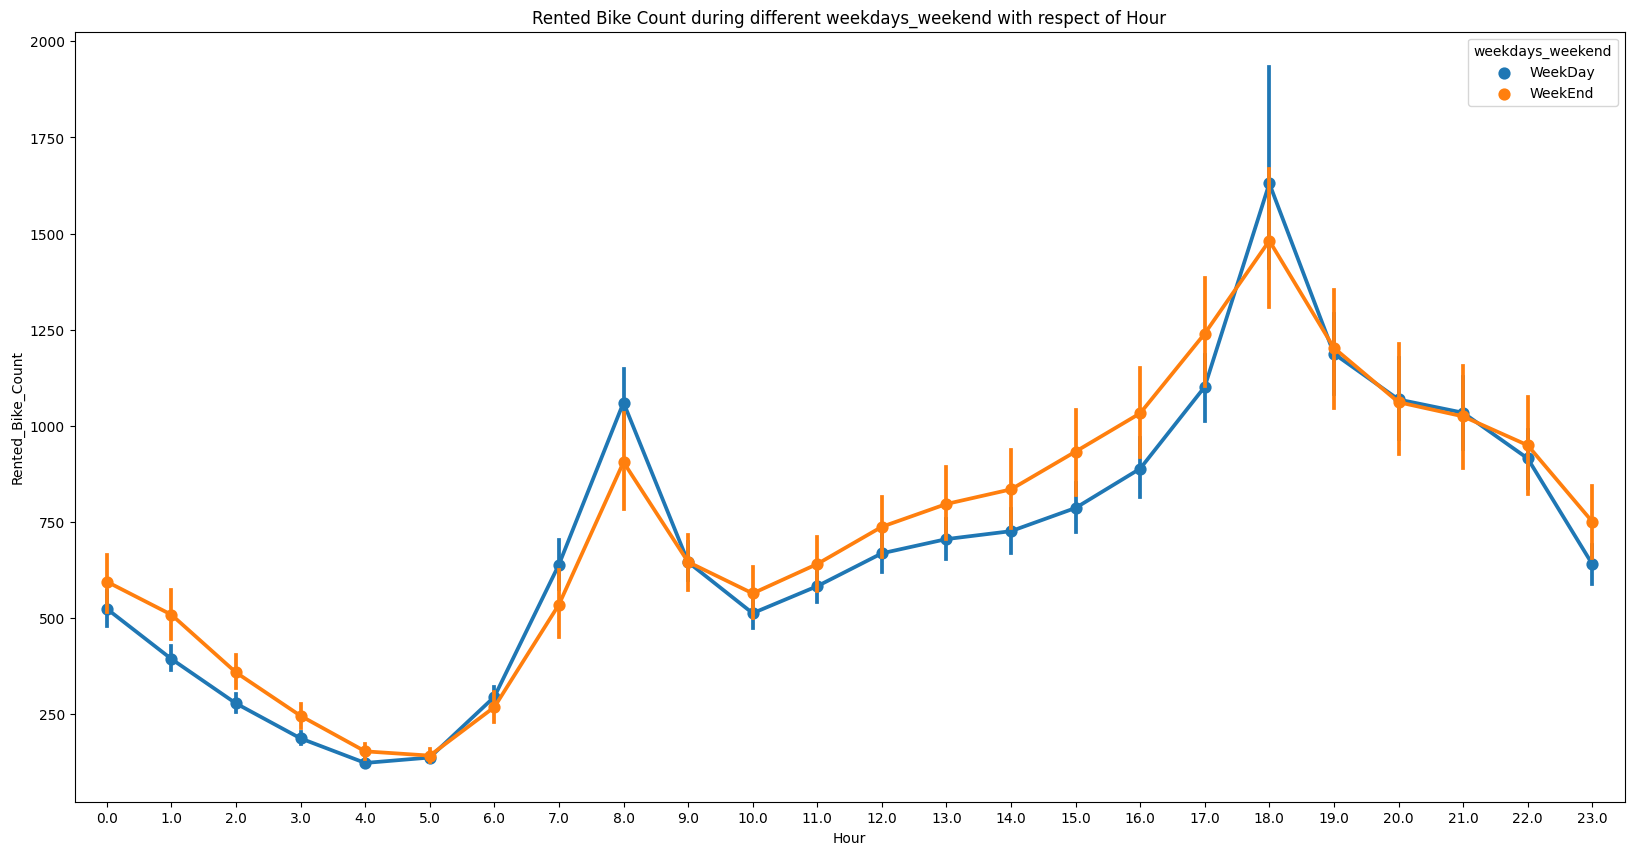

In [44]:
# we create point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_data.columns:
    if i == 'Hour':
        pass
    else:
        plt.figure(figsize=(20,10))
        sns.pointplot(x=df["Hour"],y=df['Rented_Bike_Count'],hue=df[i])
        plt.title(f"Rented Bike Count during different {i} with respect of Hour")
        plt.show()

### Observation

* **Season**
In the season column, we are able to understand that the demand is low in the winter season.

* **Days of week**
In the Days of week column, We can observe from this column that the pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays, we can further change this column to weekdays and weekends.

* **month**
In the month column, We can clearly see that the demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.

* **HitSale**
In the Sale column we have observed that the demand is very high during sale. Huge Gap between sale and no sale.

#### Lets do some feature engineering on Hour column

In [45]:
# defining a function for distribute hour column
def hour(h):
    if h >= 17 and h <= 22:
        return 'Evening'
    elif h >= 7 and h <= 10:
        return 'Morning'
    elif h >= 11 and h <= 16:
        return 'Noon'
    else :
        return 'Night' 

In [46]:
# apply the hour function
categorical_data['Hour'] = categorical_data['Hour'].apply(hour)

In [47]:
# value count of Hour 
categorical_data['Hour'].value_counts()

Night      2896
Noon       2210
Evening    2188
Morning    1457
Name: Hour, dtype: int64

In [48]:
plt.style.use('ggplot')



******************************************************* Hour *******************************************************




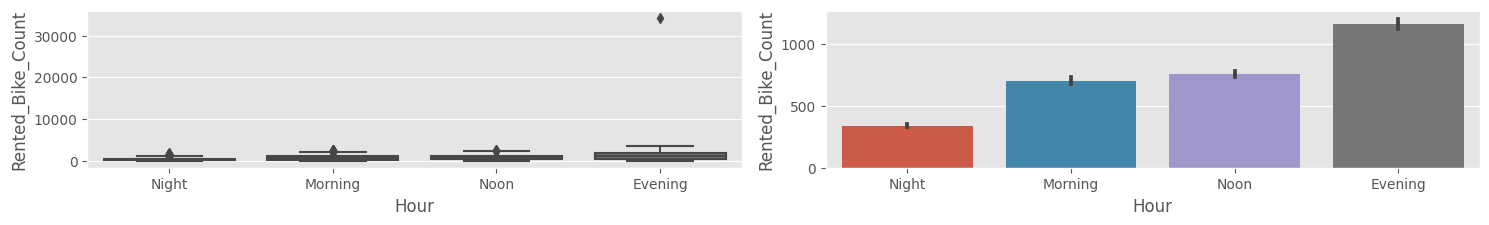



******************************************************* Open *******************************************************




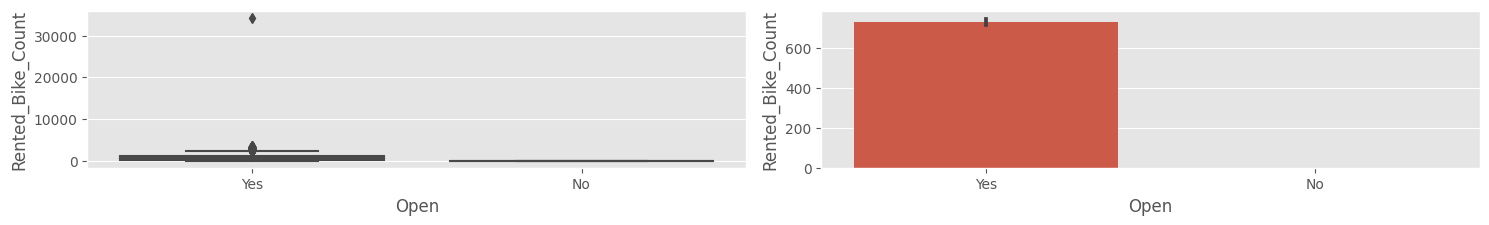



******************************************************* Hit_Sales *******************************************************




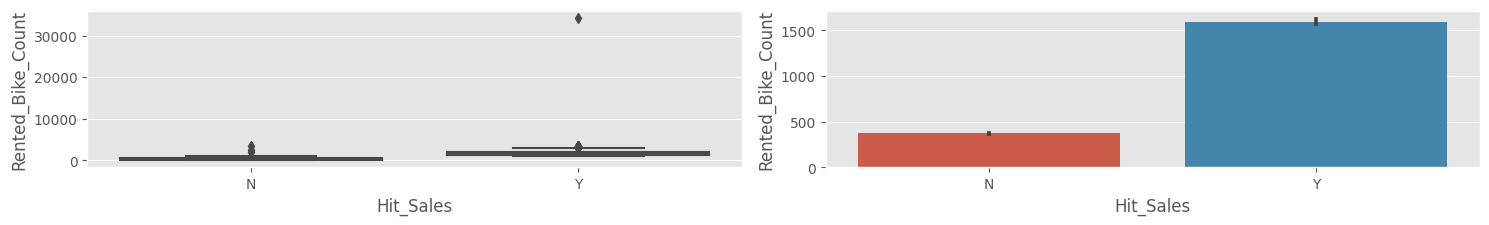



******************************************************* Season *******************************************************




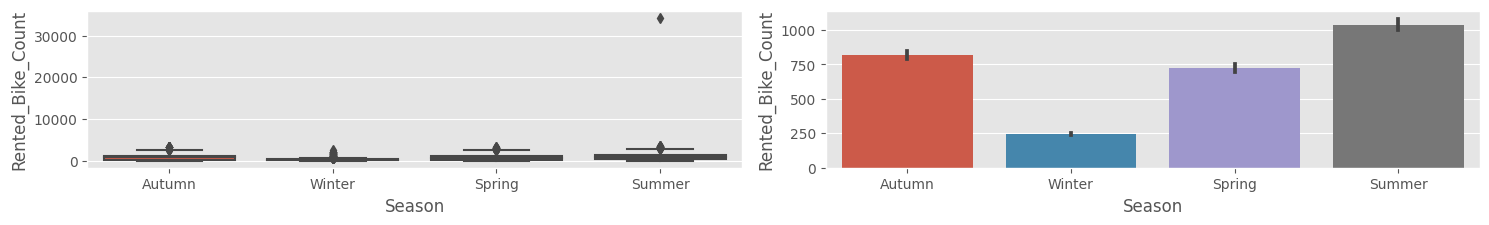



******************************************************* month *******************************************************




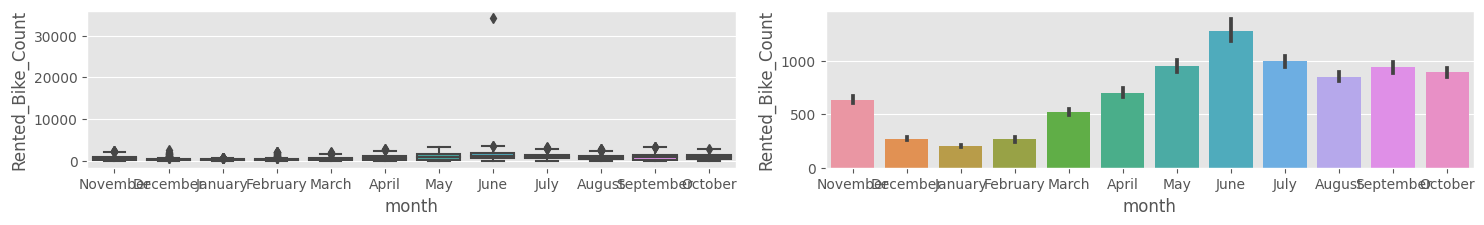



******************************************************* day_of_week *******************************************************




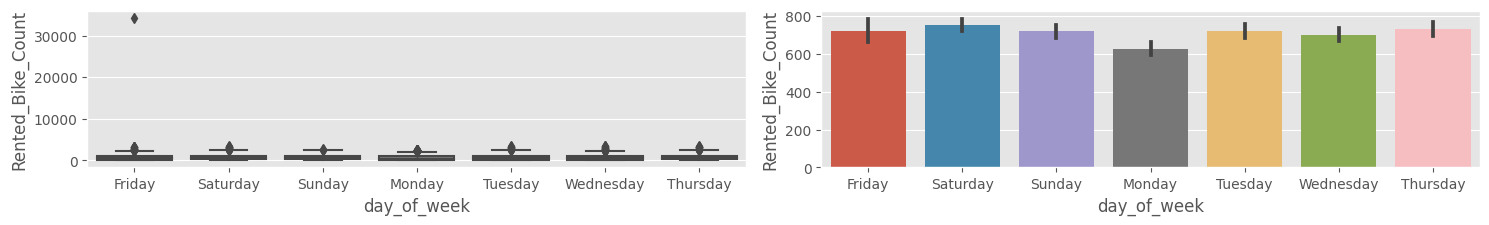



******************************************************* weekdays_weekend *******************************************************




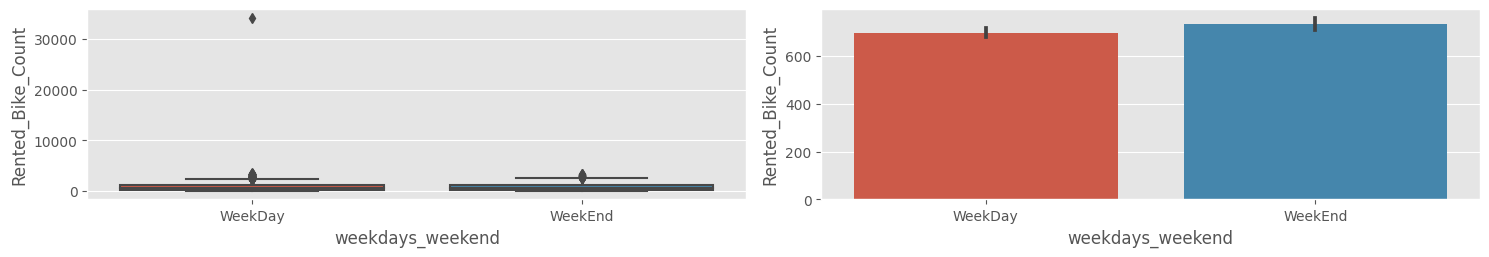

In [49]:
# creating boxplot plot and bar plot
n=1
for i in categorical_data.columns:
    plt.figure(figsize=(15,15))
    plt.subplot(7,2,n)
    n+=1
    print('\n')
    print('*'*55,i,'*'*55)
    print('\n')
    sns.boxplot(x=categorical_data[i],y=df["Rented_Bike_Count"])
    plt.subplot(7,2,n)
    n+= 1
    sns.barplot(categorical_data[i],df['Rented_Bike_Count'])
    plt.tight_layout()
    plt.show()

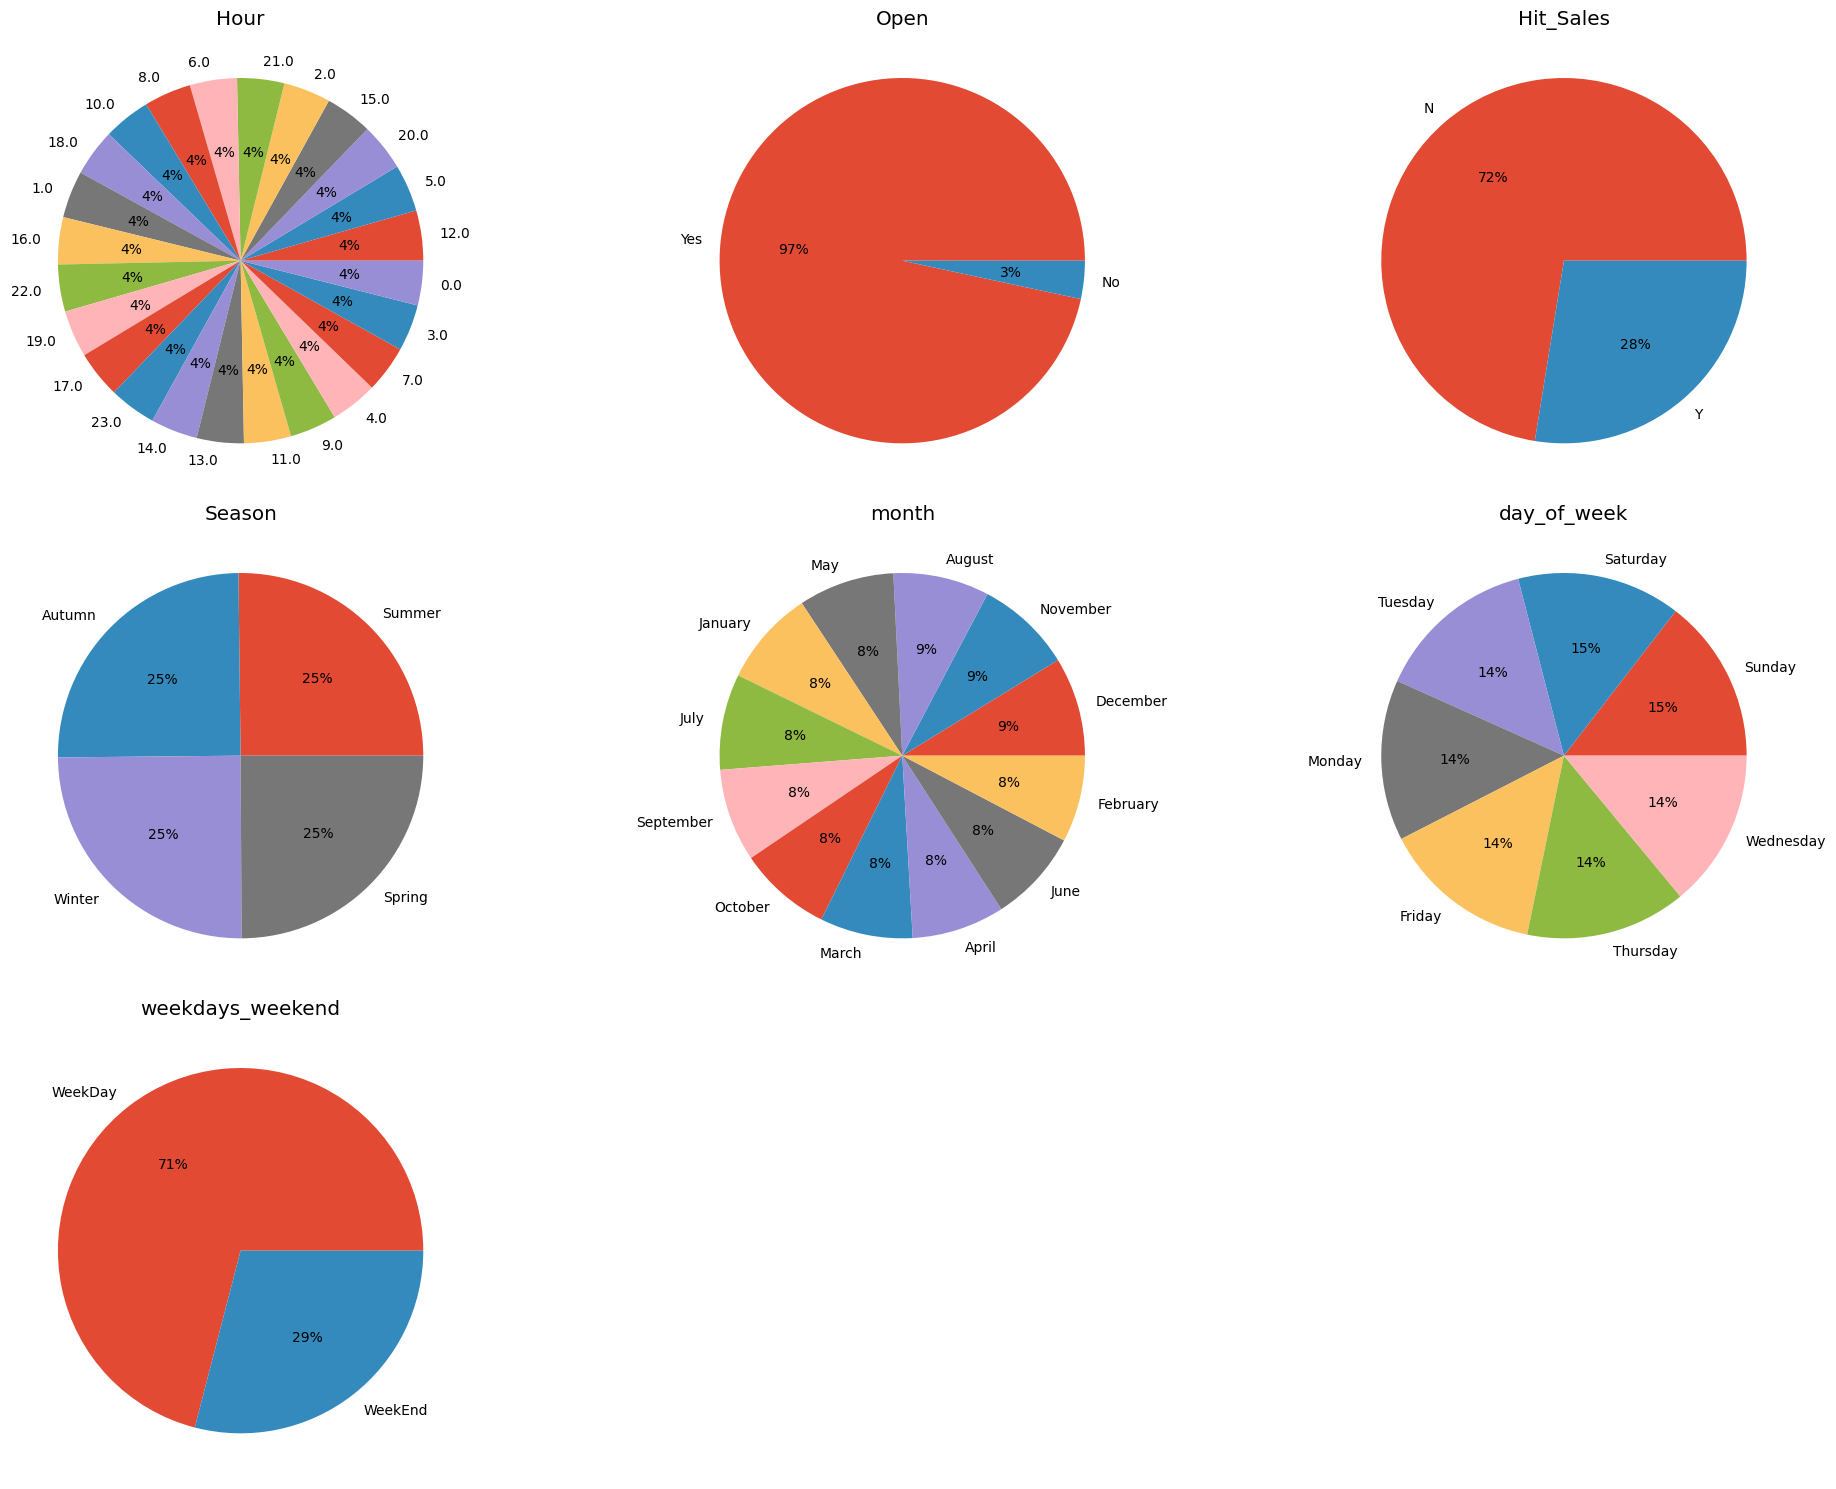

In [50]:
# creating boxplot for all categorical feature
n=1
plt.figure(figsize=(20,15))
for i in categorical_data.columns:
    plt.subplot(3,3,n)
    n=n+1
    plt.pie(df[i].value_counts(),labels = df[i].value_counts().keys().tolist(),autopct='%.0f%%')
    plt.title(i)
    plt.tight_layout()

### Let's Explore the Numerical Columns



************************************************** Rented_Bike_Count **************************************************




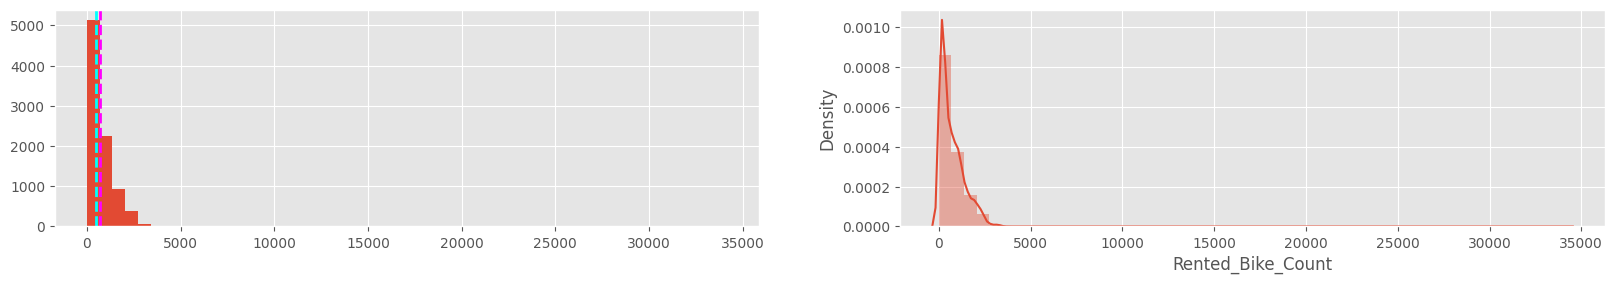



************************************************** Humidity **************************************************




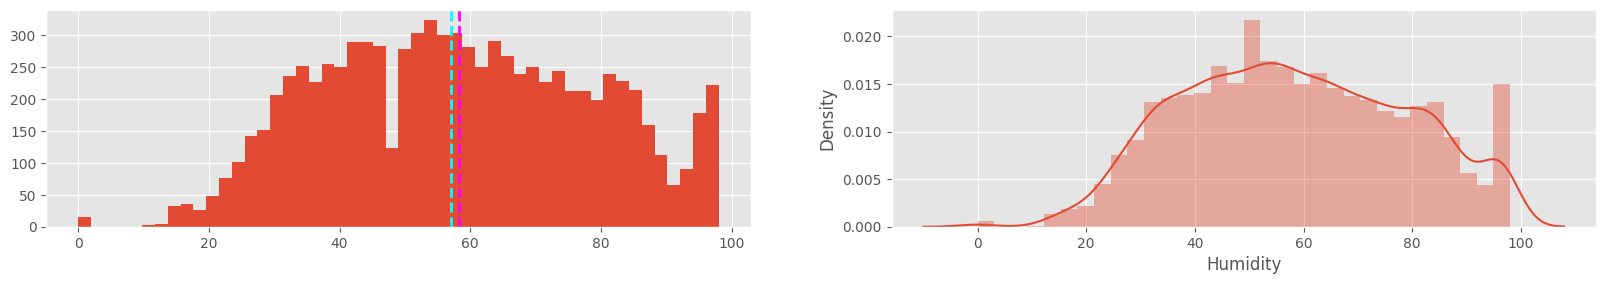



************************************************** Windspeed **************************************************




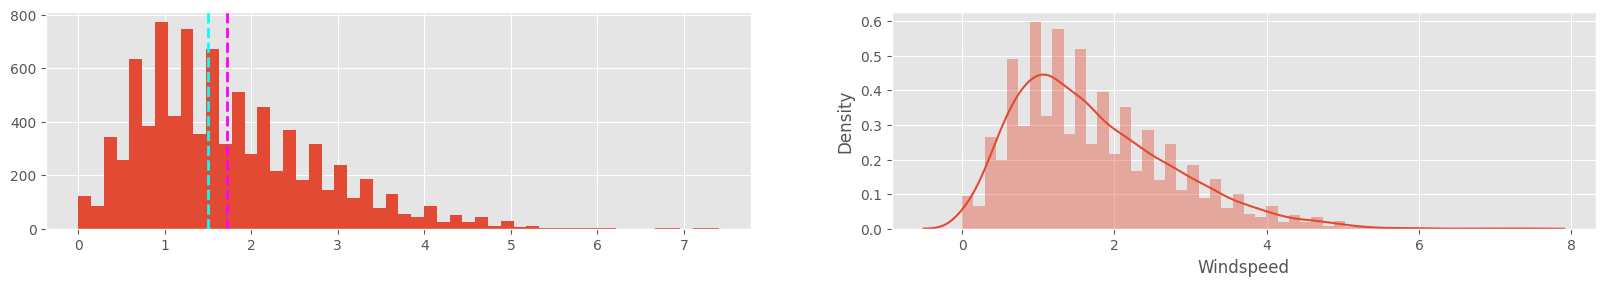



************************************************** Dewpoint_Temp **************************************************




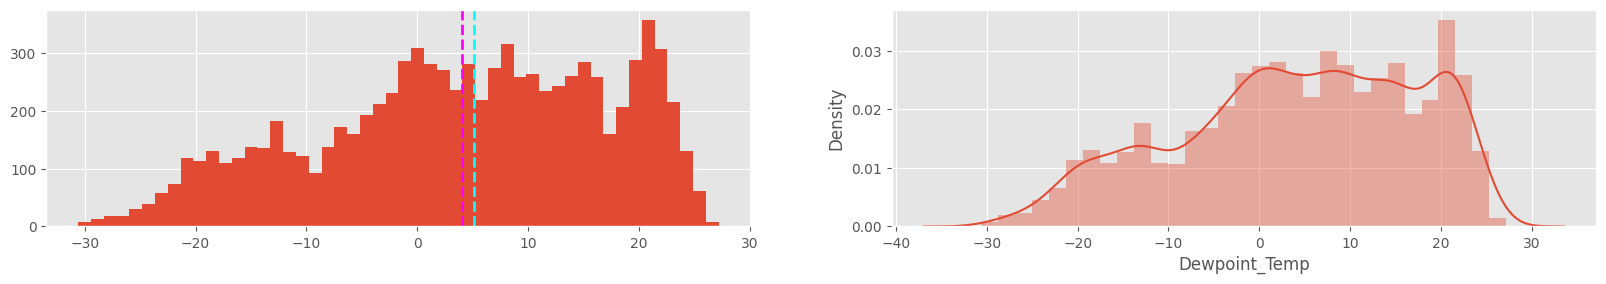



************************************************** Solar_Radiation **************************************************




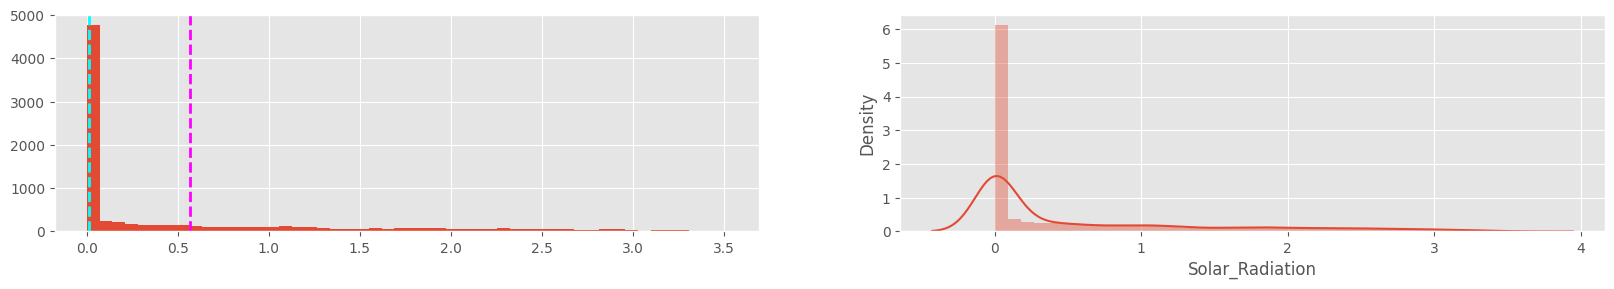



************************************************** Rainfall **************************************************




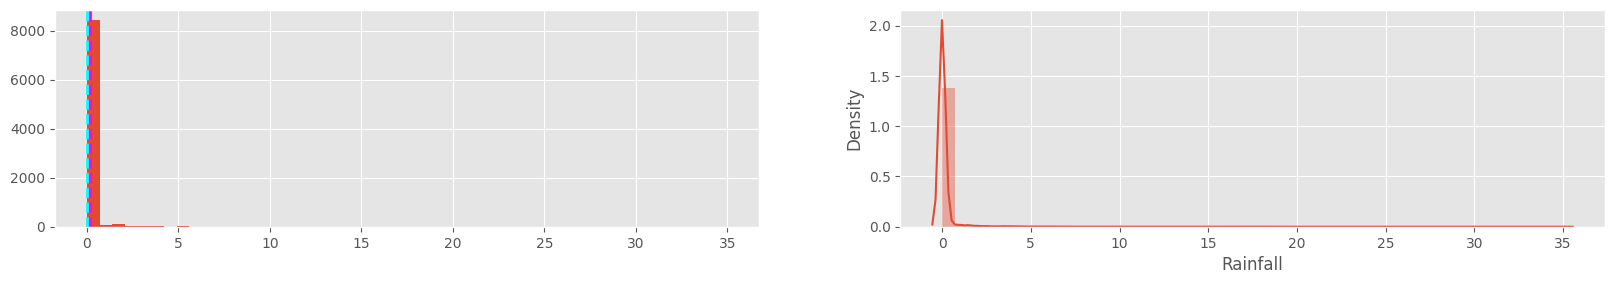



************************************************** Snowfall **************************************************




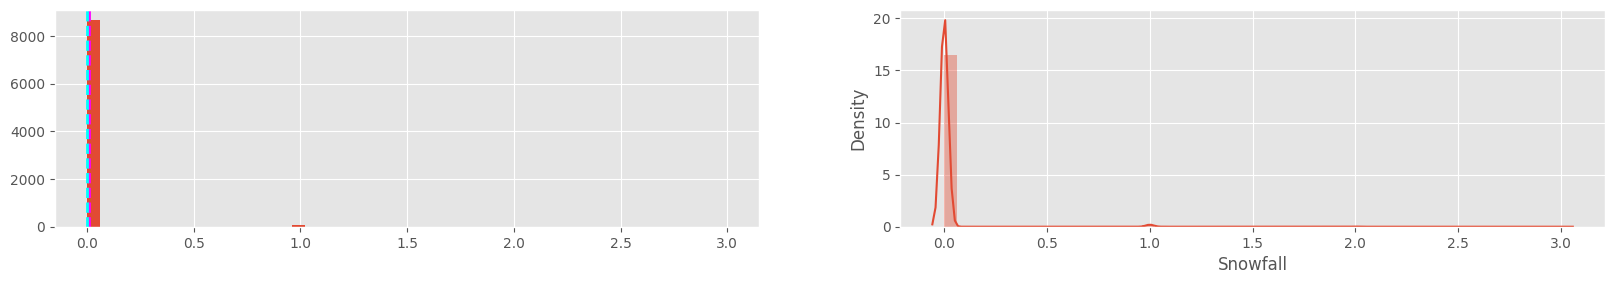



************************************************** Temperature_bin **************************************************




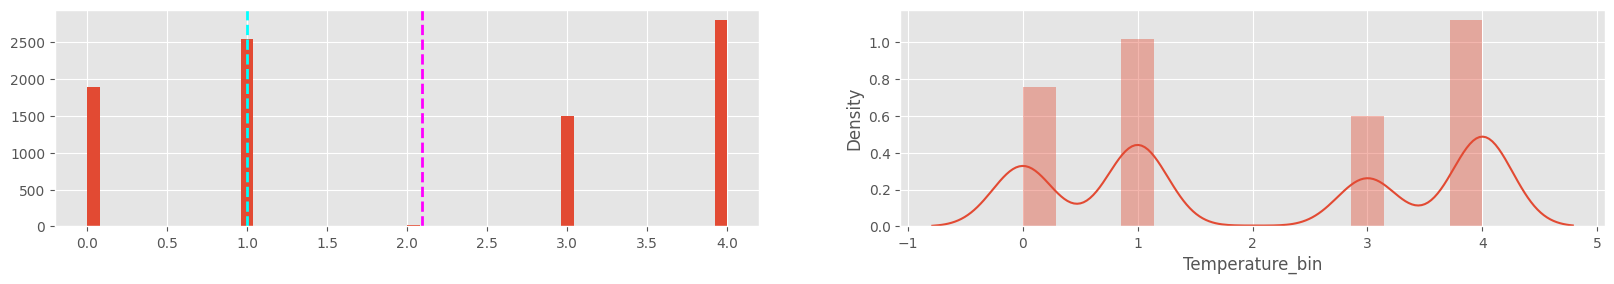

In [51]:
#plotting histogram with mean and median, and distplot of all the numeric features of the dataset
n=1
for i in numeric_data.columns:
    plt.figure(figsize=(20,40))
    plt.subplot(12,2,n)
    n+=1
    print('\n')
    print('*'*50,i,'*'*50)
    print('\n')
    # fig=plt.figure()
    # ax=fig.gca()
    feature=df[i]
    feature.hist(bins=50,)
    plt.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2) 
    plt.subplot(12,2,n)
    n+= 1
    sns.distplot(df[i])
    # plt.tight_layout()
    plt.show()

### Observation

In these plots we observe that some of our columns is right skewed and some are left skewed we have to remember this things when we apply algorithms

**Right skewed columns**: 
Rented Bike Count (Its also our Dependent variable), Wind speed, Solar Radiation, Rainfall, Snowfall

**Left skewed columns**:
Visibility, Dew point temperature

From Histogram we have observed that the features which are skewed, their mean and the median are also skewed, which was understood by looking at the graph that this would happen.

# <font color= maroon> Data Modelling

### Data Preparation

In [56]:
#drop unnecessary columns which will not be used in modeling
df.drop(['Date', 'Country', 'Region'], axis = 1 , inplace = True)

In [63]:
#convert hours into float
df['Hour'] = df['Hour'].astype(float)

In [66]:
# convert binary attributes into zero and 1
df['Open'] = df['Open'].map({'Yes':1, 'No':0})
df['Hit_Sales'] = df['Hit_Sales'].map({'Y':1, 'N':0})

In [69]:
prepared_df = pd.get_dummies(df,drop_first=True,sparse=True)

#### Split the data into train and test & Scale data

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
X = prepared_df.drop("Rented_Bike_Count", axis=1)
y = prepared_df["Rented_Bike_Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

print("Shape of X_train : ", X_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (7000, 31)
Shape of y_train :  (7000,)
Shape of X_test :  (1751, 31)
Shape of y_test :  (1751,)


In [78]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## <font color= grey> Linear Regression

Provide the description, justification and results of your technique(s) here.

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [81]:
y_pred = lr.predict(X_test)

In [82]:
y_pred

array([ 380.13145822,  469.75645822,  290.36583322, ...,  543.13145822,
       1599.49083322, 1923.49083322])

#### Model Evaluation

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [86]:
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f"MSE : {MSE}")
print(f"RMSE : {RMSE}")
print(f"MAE : {MAE}")
print(f"R2 : {R2}")

MSE : 81669.64037691525
RMSE : 285.7790061864504
MAE : 214.30296781287183
R2 : 0.8020023895656985


The **MSE** is 81669.64. A lower MSE indicates a better fit to the data, as it represents smaller errors on average.

The **RMSE** is 285.78. Since the RMSE is in the same unit as the target variable (Rented_Bike_Count), it represents the average difference between the predicted and actual counts of rented bikes. A smaller RMSE indicates better model performance and more accurate predictions.

The **MAE** is 214.30. The MAE represents the average magnitude of errors without considering their direction. Similar to RMSE, a smaller MAE indicates better model performance and more accurate predictions.

The **R2 score** represents the proportion of variance in the target variable that is explained by the model. In this case, the R2 score is 0.802, which means that approximately 80.2% of the variance in the rented bike counts can be explained by the features included in the model. A higher R2 score indicates better model fit, where values closer to 1 represent a stronger ability to explain the target variable.


#### Interpretation:
The results indicate that the linear regression model performs relatively well. The low values of MSE, RMSE, and MAE suggest that, on average, the model's predictions are close to the actual values of the rented bike counts. Additionally, the R2 score of 0.802 implies that approximately 80.2% of the variability in the rented bike counts can be attributed to the included features.

Overall, the model seems reliable and reasonably accurate in predicting the number of rented bikes based on the given features.

## <font color= grey> Logistic Regression

Let's consider our target for the classification task is **"Hit_Sales,"** which represents whether a rental had high sales or not. This target is appropriate if the problem statement involves predicting whether a rental will have high sales based on the given features

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [91]:
# Selecting features and target variable
X = prepared_df.drop("Hit_Sales", axis=1)
y = prepared_df['Hit_Sales'] 

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lr.predict(X_test)

# Evaluating the performance of the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.970873786407767
Precision: 0.9387755102040817
Recall: 0.9563409563409564
F1-Score: 0.9474768280123584


**Accuracy:** The accuracy score is 0.970873786407767, indicating that approximately 97.1% of the predictions are correct. A high accuracy suggests that the model performs well in classifying instances correctly.

**Precision:** Precision score is 0.9387755102040817, which means that approximately 93.9% of the predicted positive instances are indeed true positives. A high precision indicates that the model has a low rate of falsely labeling instances as positive.

**Recall:** Recall Score is 0.9563409563409564, indicating that approximately 95.6% of the actual positive instances are correctly identified by the model. A high recall suggests that the model has a low rate of falsely classifying positive instances as negative.

**F1-Score:** The F1-Score is 0.9474768280123584, which indicates the balance between precision and recall. The F1-Score is useful when you want to consider both precision and recall simultaneously.



## <font color= grey> k-means clustering

In [94]:
from sklearn.cluster import KMeans

While applying K-means clustering to your dataframe, it's important to select the appropriate columns that will effectively capture the patterns and structure in the data. In this case, since the target variable 'Rented_Bike_Count' is included in the dataset, it should not be used as a feature for clustering, as it can lead to target leakage.

Based on the remaining columns , a suitable selection of features for K-means clustering could be:

['Hour', 'Humidity', 'Windspeed', 'Dewpoint_Temp', 'Solar_Radiation', 'Rainfall']

These columns represent various environmental factors and weather conditions that may influence bike rentals. By clustering based on these features, you can identify groups of instances with similar patterns in these factors.

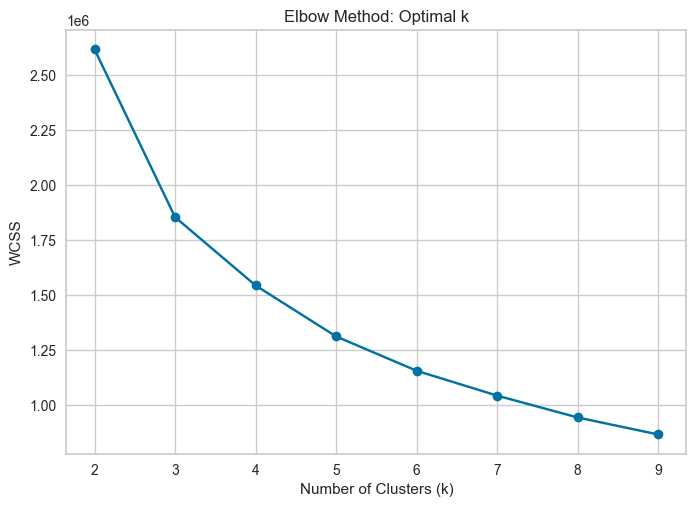

In [112]:
# Selecting the columns for clustering
columns_for_clustering = ['Hour', 'Humidity', 'Windspeed', 'Dewpoint_Temp', 'Solar_Radiation', 'Rainfall']

# Preprocessing the data
X = df[columns_for_clustering]

# Perform K-means clustering for different k values
k_values = range(2, 10)  # Range of k values to evaluate
wcss = []  # Within-cluster sum of squares

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method: Optimal k')
plt.show()

The above graph selects an Elbow point at K=4, but K=3 also looks like a plausible elbow point. So, it is not clear what should be the Elbow point.

Let's validate it through silhouette score

In [113]:
from sklearn.metrics import silhouette_score

In [114]:
for i in [ 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # Calculating the Silhouette coefficient
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For cluster {i}: Silhouette Coefficient: {silhouette_avg}")

For cluster 3: Silhouette Coefficient: 0.3440374303774935
For cluster 4: Silhouette Coefficient: 0.3242656322066977
For cluster 5: Silhouette Coefficient: 0.30763453281164477


The Silhouette score is maximum(0.42) for K = 3

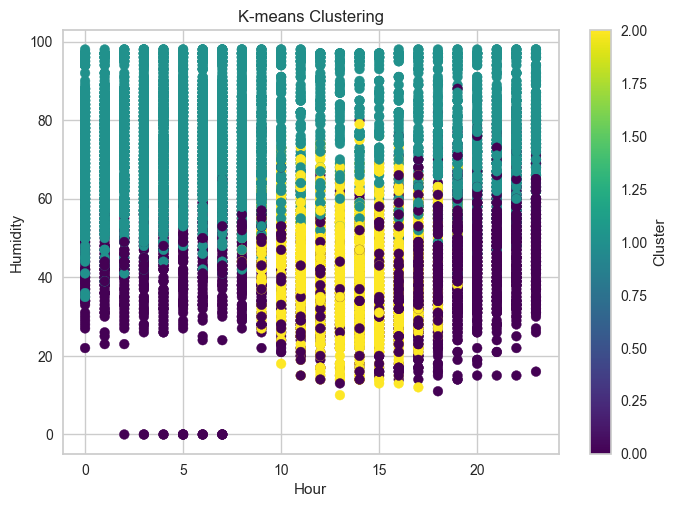

In [115]:


# Performing K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_normalized)
cluster_labels = kmeans.labels_

# Adding the cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Visualizing the clusters
plt.scatter(df['Hour'], df['Humidity'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Hour')
plt.ylabel('Humidity')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

<div class="alert alert-block alert-info">
<b>Remember to highlight in the report</b>
    
     - Why or why not you have adopted the suggestions provided by ChatGPT or other literatures
     - If adopted, indicate clearly where to find the supporting evidences or coding cells implementing them
     - Be specific in what tweak(s) is/are required to make the suggestions work or make predictive model(s) improve.
</div>

# <font color= maroon> Recommendations & Conclusion

1. In Winter season the Demand of Rented bike is low and High in summar.

2. There is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

3. There is a High demand of bikes during sales.

4. The demand is low in December January & Febuary, It is cold in these months and we have already seen in season column that demand is less in winters.

5. The pattern of weekdays and weekends is different, in the weekend the demand becomes high in the afternoon. While the demand for office timings is high during weekdays, we can further change this column to weekdays and weekends.

7. The Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.

6. For rented bike count Prediction we have used linear Regression model because we have regression problem here. 

8. Linear regression model has performed really well since the performance metrics (mse,rmse) shows lower and (r2) shows a higher value for the linear Regression.

9. For the classification problem we have choosen hit sale as a target column, **Hit Sale** represents whether a rental had high sales or not. This target is appropriate if the problem statement involves predicting whether a rental will have high sales based on the given features.
10. For Classification problem we have got amazing results with 97% accuracy.


# <font color= maroon> References

1. Pandas library [https://pandas.pydata.org/]
2. Seaborn [https://seaborn.pydata.org/generated/seaborn.heatmap.html]
3. Matplotlib libarary [https://matplotlib.org/].
4. Stats model [https://www.statsmodels.org/stable/index.html]
5. Sklearn [https://scikit-learn.org/stable/]